<a href="https://colab.research.google.com/github/rlysell/ImageClassification/blob/Branch1/ImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
from tensorflow.python.keras.layers.pooling import MaxPool2D

data = keras.datasets.cifar10

EPOCHS = 100
BATCH_SIZE = 32
val_split = 0.2

(train_images, train_labels), (test_images, test_labels) = data.load_data()

classes = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(lr=0.001)
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

def def_model():
    model = keras.Sequential([
        Conv2D(64, (3, 3), input_shape=(
            32, 32, 3), activation='relu'),
        Conv2D(64, (3, 3), input_shape=(
            32, 32, 3), activation='relu'),
        MaxPool2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPool2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPool2D((2, 2)),
        Flatten(input_shape=()),
        #Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.L2(0.05)),
        #Dense(512, activation='relu', kernel_regularizer=keras.regularizers.L1(0.05)),
        #Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

def train_model(model):
    history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_split=val_split, batch_size=BATCH_SIZE, callbacks=callback)
    return history, model

def load_model():
    model = tf.keras.models.load_model('saved_image_model')
    return model

def plot_model(history):
    plt.figure(figsize=(32, 32))
    plt.plot(history.history['accuracy'])


In [50]:

model = def_model()
try:
  history, model = train_model(model)
except:
  print("An error occured")
try:
  model.save('saved_image_model')
except:
  print('Unable to write to file')

Epoch 1/100
1250/1250 [==============================] - 19s 14ms/step - loss: 1.9059 - accuracy: 0.2739 - val_loss: 1.3292 - val_accuracy: 0.5127
Epoch 2/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.3185 - accuracy: 0.5271 - val_loss: 1.1324 - val_accuracy: 0.5969
Epoch 3/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1595 - accuracy: 0.5878 - val_loss: 1.0928 - val_accuracy: 0.6153
Epoch 4/100
1250/1250 [==============================] - 17s 14ms/step - loss: 1.0496 - accuracy: 0.6325 - val_loss: 0.9821 - val_accuracy: 0.6541
Epoch 5/100
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9682 - accuracy: 0.6552 - val_loss: 0.9085 - val_accuracy: 0.6886
Epoch 6/100
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9053 - accuracy: 0.6821 - val_loss: 0.8538 - val_accuracy: 0.7022
Epoch 7/100
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8497 - accuracy: 0.7016 - val_loss: 0

313/313 [==============================] - 2s 6ms/step - loss: 1.0476 - accuracy: 0.6797


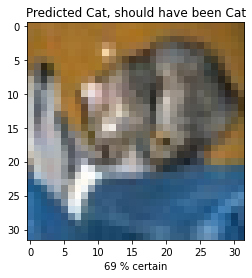

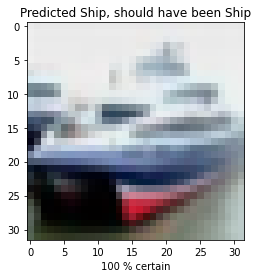

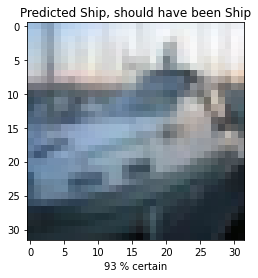

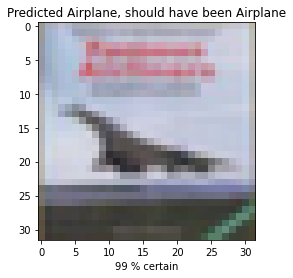

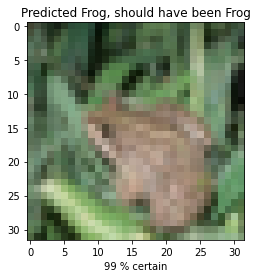

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

predictions = model.predict(test_images)
for i in range(5):
    plt.figure()
    plt.imshow(test_images[i])
    plt.title("Predicted " + classes[np.argmax(predictions[i])] + ", should have been " + classes[test_labels[i][0]])
    plt.xlabel(f"{round(np.max(predictions[i])*100)} % certain")

In [30]:
(test_labels[4][0])

6